## Python Exercise

This is the online version of Sanvi's code

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os 
import sys
import random
from scipy.stats import expon

### Returns Vector of size a with distype distribution

In [2]:
def vector_generator(a,distype):
    arr = np.zeros(a)
    if (distype == 'binary'):
        arr[:a//2] = 1
        np.random.shuffle(arr)
    elif (distype == 'expon'):
        arr = expon.rvs(scale=1,loc=0,size=a)
    else:
        print('invalid type value')
    #print(arr)
    return arr
    

### Returns r x c Matrix of different types of distributions

In [3]:
def matrix_generator(row, column, distype, shape=0, scale=0):
    if (distype == 'random'):
        a = np.random.rand(row, column)
    elif (distype == 'uniform'):
        a = np.random.uniform(0, 25, row*column)
        a = a.reshape(row, column)
    elif (distype == 'gaussian'):
        a = np.random.normal(loc=shape,scale=scale,size=(row,column))
    elif (distype == 'exponential'):
        a = np.random.exponential(size=(row,column))
    elif (distype == 'gamma'):
        a = np.random.gamma(shape, scale, row*column)
        a = a.reshape(row, column)
    else:
        print('invalid type value')
        
    #print(a)
    return a

### Returns Matrix Multiplication of Vector of size a (binary distribution) and Matrix of size a x b

In [4]:
def output_vector_generator(a, b, distype, shape=2, scale=3):
    return vector_generator(a, 'binary') @ matrix_generator(a, b, distype, shape, scale)

### Returns Matrix Multiplication of Matrix a and Matrix b

In [5]:
def matrix_multiply(a,b):
    return a @ b

### Output

In [6]:
smell_vector_size = 8;
num_smells = 20;
output_vector = output_vector_generator(smell_vector_size,num_smells,'gaussian');

In [7]:
#print(c)

In [8]:
#set negative values of output vector to zero 
output_vector[output_vector < 0] = 0

#make copy of output vector
output_vector2 = output_vector.copy()
APL = output_vector.sum()/len(output_vector)
print(APL)
print(output_vector)
print(output_vector2)

8.278660100791866
[ 4.13432853  1.80323153  6.0384097   8.74302906  6.79797048 21.91569016
 16.06654359  9.68241947 11.5286018  11.63798434  1.0116239   0.74729302
  7.06754161  6.08351937 10.66246075 10.83020839  9.17664501  1.95748288
  9.32186881 10.3663496 ]
[ 4.13432853  1.80323153  6.0384097   8.74302906  6.79797048 21.91569016
 16.06654359  9.68241947 11.5286018  11.63798434  1.0116239   0.74729302
  7.06754161  6.08351937 10.66246075 10.83020839  9.17664501  1.95748288
  9.32186881 10.3663496 ]


In [9]:
print(c)

NameError: name 'c' is not defined

### Reference Code 
constant = 1.017058973187651

m = len(c)

c = c - APL*constant

print(c)

c[c<0]=0

x = np.linspace(1,max(c), m)

print(x)

print(m)

x = range(1,m+1)

print(x)

plt.plot(x,c,"r-")

plt.show()

np.count_nonzero(c) / len(c)

plt.plot(x,d,"b-")

plt.show()

### Calculate Kenyon Cells Output

kc: output_vector

aplcons: APL constant

In [10]:
def CalKCOutput(kc, aplcons):
    #apl is average value of KC
    apl = sum(kc)/len(kc)
    #print(type(kc))
    
    #kcout is apl * aplcons subtracted from KC values
    kcout = kc.copy()
    for i in range(len(kcout)):
        kcout[i] = kc[i] - apl*aplcons
    #print(kc,"\n",apl*aplcons,"\n",kcout)
    
    #return tuple of kc, kcout, apl
    return(kc,kcout,apl)

### Returns fraction of Kenyon Cells fired

vec: vector

thresh: threshold

In [11]:
def NumberAboveThresh(vec, thresh = 0):
    res = len(vec[np.where(vec>thresh)]) / len(vec)
    return(res)

### Fly Matrix

In [12]:
flymat = matrix_generator(smell_vector_size, num_smells, "gaussian", 4, 0.2)

list_of_smell_vectors = []
for i in range(num_smells):
    list_of_smell_vectors.append(vector_generator(smell_vector_size, "expon"))
    
list_of_kenyon_cells = []
for i in range(num_smells):
    list_of_kenyon_cells.append(matrix_multiply(list_of_smell_vectors[i], flymat))

### Calculate APL Constant

In [13]:
def CalAPLconstant(kcout, topn):
    kc = kcout[0]
    kcsort = np.sort(kc)
    posn = (1-(topn/100))*len(kcsort) - 1 #0-base, substract 1
    posn = int(posn)
    aplval = kcsort[posn]
    res = aplval/kcout[2]
    return(res)
#CalAPLconstant(50,1000,5,"gaussian")

In [16]:
list_of_kenyon_celloutputs = []
for i in range(num_smells):
    list_of_kenyon_celloutputs.append(CalKCOutput(list_of_kenyon_cells[i],1.0242))
    
list_of_APL = []
for i in range(num_smells):
    list_of_APL.append(CalAPLconstant(list_of_kenyon_celloutputs[i], 5))
print (sum(list_of_APL)/len(list_of_APL))

1.0285798134311817


In [19]:
list_of_KC_matrix = []
for i in range(num_smells):
    list_of_kenyon_celloutputs[i][1][list_of_kenyon_celloutputs[i][1] < 0] = 0
    pos_count = len(list_of_kenyon_celloutputs[i][1])
    kcmat = matrix_generator(pos_count, 2, 'gamma', shape=1.44, scale=0.12)
    list_of_KC_matrix.append(kcmat)
print(list_of_KC_matrix)

[array([[0.10985196, 0.22006943],
       [0.16156133, 0.17659805],
       [0.04836856, 0.12225803],
       [0.06296212, 0.23347319],
       [0.14044797, 0.21270783],
       [0.23551127, 0.59410878],
       [0.00940711, 0.22374192],
       [0.19857796, 0.1227289 ],
       [0.04604877, 0.08722426],
       [0.04857886, 0.50501947],
       [0.07908846, 0.21797548],
       [0.0412564 , 0.65012581],
       [0.03934532, 0.0709797 ],
       [0.52257199, 0.18653249],
       [0.04082147, 0.32640478],
       [0.20583491, 0.21956723],
       [0.08291694, 0.46848999],
       [0.25854305, 0.25646479],
       [0.04200714, 0.09469818],
       [0.02594475, 0.12627116]]), array([[0.09239026, 0.0837293 ],
       [0.10695487, 0.09689788],
       [0.52604694, 0.07100921],
       [0.18776642, 0.1679611 ],
       [0.52675433, 0.17908631],
       [0.01933634, 0.0736473 ],
       [0.25063189, 0.09606574],
       [0.01657192, 0.01624696],
       [0.1038503 , 0.32625165],
       [0.02980198, 0.27972782],
       

In [25]:
list_of_mushroom_body_neurons = []
for i in range(num_smells):
    list_of_mushroom_body_neurons.append(matrix_multiply(list_of_kenyon_celloutputs[i][1], list_of_KC_matrix[i]))

print(list_of_mushroom_body_neurons)

[array([0.04870375, 0.05195303]), array([0.01245458, 0.0118518 ]), array([0.02364464, 0.04284583]), array([0.03137268, 0.02551536]), array([0.14967141, 0.53438372]), array([0.04527433, 0.14011241]), array([0.15173011, 0.30899759]), array([0.04711361, 0.19562266]), array([0.01579245, 0.0031914 ]), array([0.00131157, 0.00358826]), array([0.08999721, 0.15396009]), array([0.05693242, 0.13615034]), array([0.03249946, 0.03715534]), array([0.27105934, 0.10590579]), array([0.07409459, 0.04791927]), array([0.02873674, 0.01680677]), array([0.18130544, 0.0911722 ]), array([0.23366831, 0.12283272]), array([0.17182828, 0.03571957]), array([0.08457697, 0.08659603])]


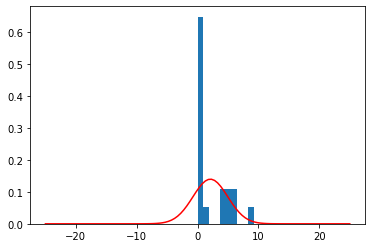

In [85]:
mean, var = sp.stats.distributions.norm.fit(c)
x = np.linspace(-25,25,100)
fitted_data = sp.stats.distributions.norm.pdf(x, mean, var)
plt.hist(c, density=True)
plt.plot(x,fitted_data,'r-')

In [20]:
0.95*40

38.0